In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv 
import edgar
import os
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df_MF = pd.read_csv(r'https://goz39a.s3.eu-central-1.amazonaws.com/13F/CIK_list.csv')
df_MF['Entity Name'] = df_MF['Entity Name']
#[i.find(isin(t)) for i in df_MF.loc[df_MF['Entity Name']]]
df_MF

,Unnamed: 0,CIK Number,Entity Name,Address_1,City,State,Zip Code
0,0,2110,COLUMBIA ACORN TRUST,227 W MONROE STE 3000,CHICAGO,IL,60606
1,1,2646,Voya INTERMEDIATE BOND PORTFOLIO,ING FUNDS SERVICES,SCOTTSDALE,AZ,85258
2,2,2663,VOYA GOVERNMENT MONEY MARKET PORTFOLIO,"7337 E. DOUBLETREE RANCH ROAD, STE 100",SCOTTSDALE,AZ,85258
3,3,2664,Voya VARIABLE FUNDS,"7337 E. DOUBLETREE RANCH ROAD, STE 100",SCOTTSDALE,AZ,85258
4,4,2691,LORD ABBETT AFFILIATED FUND INC,90 HUDSON STREET,JERSEY CITY,NJ,07302
...,...,...,...,...,...,...,...
2146,2146,1810747,Simplify Exchange Traded Funds,154 W 14TH ST,NEW YORK,NY,10011
2147,2147,1811168,2nd Vote Funds,PO BOX 2916,HENDERSONVILLE,TN,37077
2148,2148,1815558,Waycross Independent Trust,"C/O ULTIMUS FUND SOLUTIONS, LLC",CINCINNATI,OH,45246
2149,2149,1815608,Modern Capital Funds Trust,1050 JOHNNIE DODDS BLVD,MT. PLEASANT,SC,29465


In [3]:
df=pickle.load(open(r'C:\Users\ANN SERENA\Desktop\df_All',"rb"))

In [4]:
df = df['quarter_2'] #select third quarter of 2020

In [5]:
df

2,filing index,date_reported,NAME OF ISSUER,TITLE OF CLASS,CUSIP,(x$1000),PRN AMT,PRN,CIK,Entity name
4,0001567619-20-013978,2020-07-31,ABBVIE INC.,COM,00287Y109,709,7225,SH,1027796,PZENA INVESTMENT MANAGEMENT LLC
5,0001567619-20-013978,2020-07-31,AECOM,COM,00766T100,23226,618033,SH,1027796,PZENA INVESTMENT MANAGEMENT LLC
6,0001567619-20-013978,2020-07-31,ALEXION PHARMACEUTICALS INC.,COM,015351109,672,5985,SH,1027796,PZENA INVESTMENT MANAGEMENT LLC
7,0001567619-20-013978,2020-07-31,AMDOCS LIMITED,COM,G02602103,563,9243,SH,1027796,PZENA INVESTMENT MANAGEMENT LLC
8,0001567619-20-013978,2020-07-31,AMERICAN EQUITY INVESTMENT LIFE HOLDING COMPANY,COM,025676206,40031,1620029,SH,1027796,PZENA INVESTMENT MANAGEMENT LLC
...,...,...,...,...,...,...,...,...,...,...
186,0000949509-20-000004,2020-08-14,WEIBO CORP,CONVERTIBLE BOND,948596AC5,7534,8059000,PRN,949509,OAKTREE CAPITAL MANAGEMENT LP
187,0000949509-20-000004,2020-08-14,WESTERN DIGITAL CORP,CONVERTIBLE BOND,958102AP0,10640,11259000,PRN,949509,OAKTREE CAPITAL MANAGEMENT LP
188,0000949509-20-000004,2020-08-14,WORKDAY INC,CONVERTIBLE BOND,98138HAF8,6897,5000000,PRN,949509,OAKTREE CAPITAL MANAGEMENT LP
189,0000949509-20-000004,2020-08-14,ZILLOW GROUP INC,CONVERTIBLE BOND,98954MAC5,7991,7673000,PRN,949509,OAKTREE CAPITAL MANAGEMENT LP


In [6]:
# entity names as labels
labels = list(set(df['Entity name'].str.lower()))

In [7]:
labels

['ubs asset management americas inc ',
 'invesco ltd. ',
 'pictet & cie (europe) sa ',
 'metlife investment management, llc ',
 'invesco senior secured management inc /adv ',
 'ubs group ag ',
 'pictet north america advisors sa ',
 'bank pictet & cie (asia) ltd ',
 'pzena investment management llc ',
 'conning inc. ',
 'pictet bank & trust ltd ',
 'ubs oconnor llc ',
 'aegon usa investment management, llc ',
 'vanguard group inc ',
 'banque pictet & cie sa ',
 'pictet asset management ltd ',
 'vanguard capital wealth advisors ',
 'barings llc ',
 'oaktree capital management lp ',
 'transamerica financial advisors, inc. ',
 'alliancebernstein l.p. ']

In [8]:
def Adj_weight(df):
    dummies = pd.get_dummies(df['CUSIP']).astype(float)
    weights=dummies.T*np.asarray(df['(x$1000)']).astype(float)
    df_ = pd.concat([df[['CIK']],weights.T],axis=1)
    weights = df_.groupby(['CIK']).sum()
    v=np.dot(weights,weights.T)
    v=np.tril(v,0)
    return v

In [9]:
adj = Adj_weight(df)

In [10]:
adj.shape

(21, 21)

Girvan-Newman algorithm for 3rd quarter

In [ ]:
np.random.seed(3)
G = nx.from_numpy_matrix(adj)

#G=nx.relabel_nodes(G, labels)
pos= nx.draw_spring(G,with_labels=True)

plt.axis("off")
plt.show()


In [12]:
bb = nx.betweenness_centrality(G)
cc = nx.closeness_centrality(G)
dc = nx.degree_centrality(G)
centrality = {j:{'betweenness':bb[j],'closeness': cc[j],'degree': dc[j]} for i,j in enumerate(G.nodes)}
nx.set_node_attributes(G, centrality)



dict(sorted(bb.items(), key=lambda item: -item[1]))

{1: 0.0061083653188916355,
 2: 0.0061083653188916355,
 4: 0.0061083653188916355,
 5: 0.0061083653188916355,
 8: 0.0061083653188916355,
 13: 0.0061083653188916355,
 15: 0.0061083653188916355,
 16: 0.0061083653188916355,
 19: 0.0061083653188916355,
 20: 0.0061083653188916355,
 0: 0.0037081339712918666,
 7: 0.002400231347599768,
 14: 0.002400231347599768,
 18: 0.002400231347599768,
 6: 0.0013157894736842103,
 17: 0.0003759398496240601,
 3: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0}

In [58]:
summary=pd.DataFrame({'betweenness':bb, 'closeness':cc, 'degree':dc}).reset_index()

In [59]:
summary

,index,betweenness,closeness,degree
0,0,0.003708,0.952381,1.05
1,1,0.006108,1.000000,1.10
2,2,0.006108,1.000000,1.10
3,3,0.000000,0.909091,1.00
4,4,0.006108,1.000000,1.10
5,5,0.006108,1.000000,1.10
6,6,0.001316,0.769231,0.80
7,7,0.002400,0.952381,1.05
8,8,0.006108,1.000000,1.10
9,9,0.000000,0.909091,1.00


In [13]:
#find the EBC values for all the edges and then take off the edge with the largest value
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [15]:
def girvan_newman(graph):
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)
    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)
        return sg

Pass our graph to the above function

In [17]:
c = girvan_newman(G.copy())
# find the nodes forming the communities
node_groups = []
for i in c:
  node_groups.append(list(i))

In [18]:
node_groups

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]

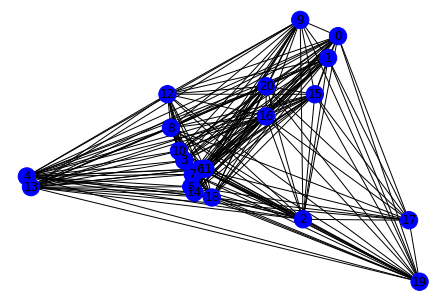

In [19]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G, node_color=color_map, with_labels=True)
plt.show()